# 사이킷런

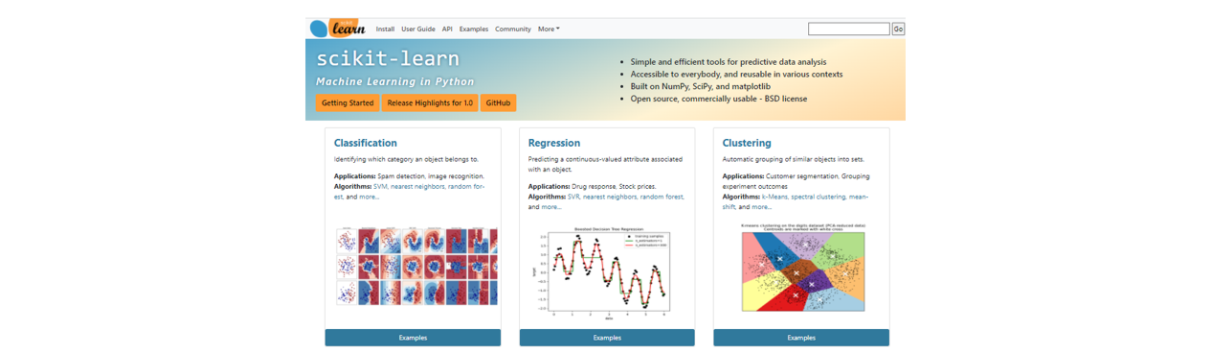

[사이킷런 사이트]https://scikit-learn.org/stable/index.html

* 머신러닝을 위한 매우 다양한 알고리즘과 모델 개발을 위해 편리한 프레임워크와 API를 제공합니다. 
* 오랜 기간 실전 환경에서 검증됐으며, 매우 많은 환경에서 사용되는 성숙한 라이브러리입니다. 

## 사이킷런 설치
* 아나콘다 프롬프트에서 아래와 같이 인스톨합니다. 
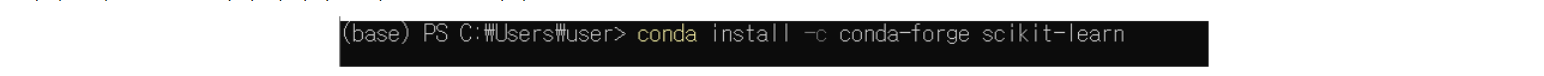

In [1]:
!pip install -U scikit-learn

     ---------------------------------------- 7.4/7.4 MB 10.3 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 9.3 MB/s eta 0:00:00


In [2]:
#사이킷런 버전 확인
import sklearn
sklearn.__version__

'1.1.2'

# 지도학습과 프로세스

* 지도학습은 입력과 출력 데이터가 있고 이를 모델화시켜 새로운 데이터에 대한 정확한 출력을 예측하도록 하는 것입니다. 
* 즉, 사전에 정답 데이터를 제공한 후, 제공된 데이터에서 규칙과 패턴을 스스로 학습하는 방 법입니다. 

* **그러므로 데이터의 레이블을 만들 수 없는 경우에는 적용할 수 없습니다.**


* 지도학습을 위해서는 **학습 단계**와 **예측 단계**를 거칩니다. 
* 학습 단계에서는 훈련 데이터를 이용하여 학습을 시켜 데이터의 특징에 대한 분석을 통해 모델을 생성합니다. 
* 예측 단계에서는 새로운 데이터에 대해 생성된 모델을 적용하여 예측하는 과정으로 이루어집니다.


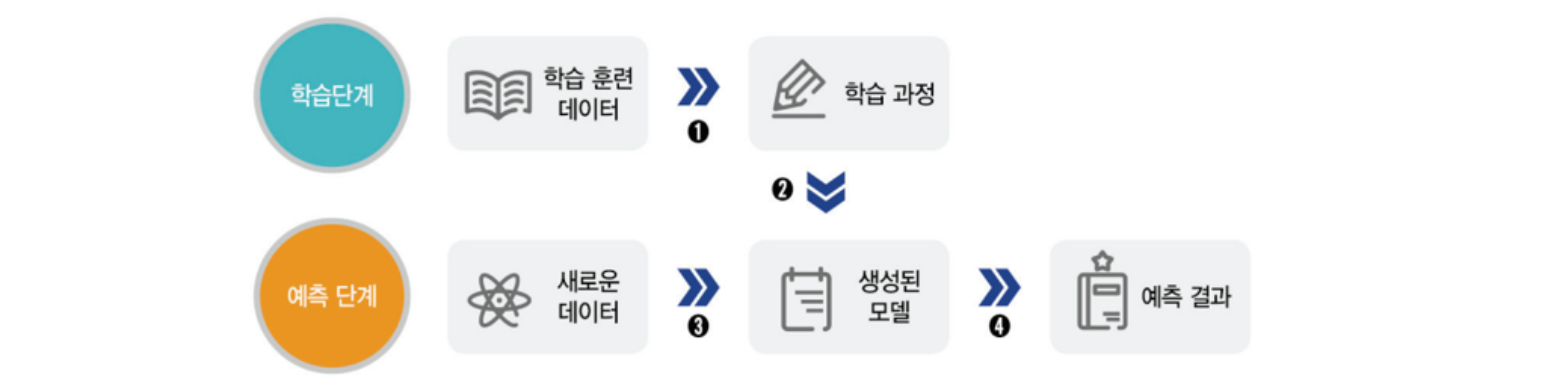

지도학습에는 항상 레이블이 있어야한다~!~!

# 머신러닝 워크프로우와 비교 중요!

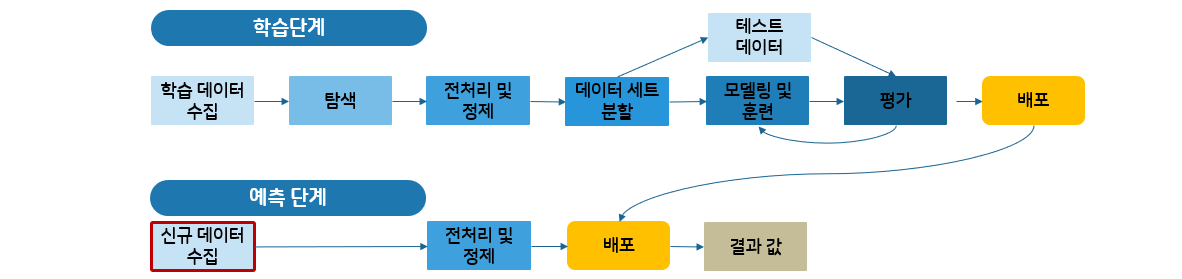

---

# 붓꽃(Iris) 품종 예측하기

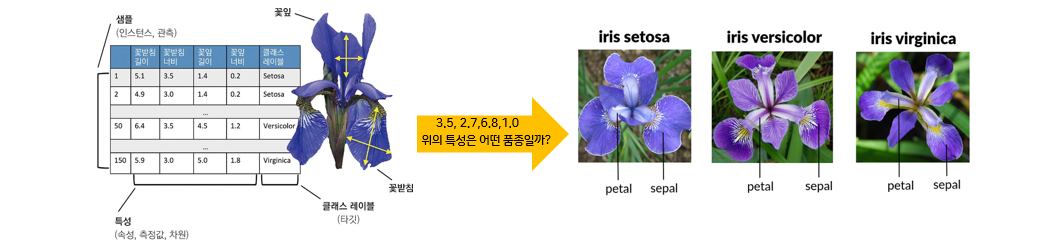

---
## 프로세스 (패턴)

**1. 데이터 로드**

**2. 데이터 전처리 및 탐색**

**3. 데이터 세트 분리** : 데이터를 훈련 데이터와 테스트 데이터로 분리합니다. 

**4. 모델 학습**: 훈련 데이터를 기반으로 머신러닝 알고리즘을 적용해 모델을 학습시킵니다. 

**5. 예측 수행**: 훈련된 머신러닝 모델을 이용해 테스트 데이터의 분류를 예측합니다. 

**6. 평가**: 예측된 결과값과 테스트 데이터의 실제 결과값을 비교해 내가 만든 모델 성능을 평가합니다. 

In [2]:
#프로세스대로 import

import pandas as pd #분석후 만들기때문에 필요

from sklearn.datasets import load_iris   #내장데이터 셋

from sklearn.model_selection import train_test_split   #데이터 셋 분리

from sklearn.tree import DecisionTreeClassifier  #분류 알고리즘을 선택

from sklearn.metrics import accuracy_score  #분류 평가

## 데이터 로드

In [15]:
# 붓꽃 데이터 세트를 로딩합니다. 
iris = load_iris()

# iris.data는 Iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있습니다. 
iris_data = iris.data# iris['data'] 같다.
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

4개의 featuer가 모여 있음.

In [6]:
#feature data 에 대한 이름을 가져옴.
iris.feature_names
# iris['feature_names'] 위 코드와 같다.

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [24]:
# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpy로 가지고 있습니다. 
iris_label = iris.target #타겟 == 레이블 
#iris_label = iris['target'] 과 같다.
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)
# 0 1 2 로 이뤄져있음. 
# 1은'setosa ' 2는  'versicolor' 3은 'virginica' 

#데이터 전처리단꼐에서 문자형을 숫자로 변환해야지만 결과를 낸다. 현재는 이미 전처리가끝난 깨끗한데이터임..

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


In [25]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [26]:
# 붓꽃 데이터 세트를 자세히 보기 위해 DataFrame으로 변환합니다. 
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


5.1	3.5	1.4	0.2 이 0임
4.9	3.0	1.4	0.2 이 0임 을 컴퓨터가 학습함. 

## 데이터 전처리 및 탐색

In [27]:
iris_df.info() #결측치가 없다,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   label              150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [28]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


## 데이터 세트 분리

In [29]:
# 1번 파라미터 : 데이터
# 2번 파라메타 : 레이블
# 3번 파라메타 : 훈련 8 : 테스트 2 로 분할을 해라.
# 4번 파라메타 : random.seed() 랜덤을 줌 랜덤으로 셔플을해 추출을하는데 11로 고정함..


#iris_data axis = 1
#iris_label axis = 0 등의 형태?

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label,test_size=0.2, random_state=11)

#훈련시에는 x_train .ytrain(레이블)
#테스트시에는 x_test. y_test(레이블)


In [30]:
X_train.shape#훈련용

(120, 4)

In [12]:
X_test.shape#테스트용으로 씀.

(30, 4)

In [18]:
y_train.shape # 벡터임. 

(120,)

In [20]:
y_test.shape # 벡터

(30,)

## 모델 학습

In [31]:
# 분류 모델 선정
#DecisionTreeClassifier 객체 생성 

dt_clf = DecisionTreeClassifier(random_state=11) # 결정 트리 알고리즘이 구현됨 사이킷런 클래스

# 학습 수행 
dt_clf.fit(X_train, y_train) #fit(학습할때)으로 x_train 과 y_train을 쓰겠다.

DecisionTreeClassifier(random_state=11)

## 예측 수행

In [39]:
# 학습이 완료된 DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행. 
pred = dt_clf.predict(X_test)# predict (예측)한다 x_test를

In [40]:
pred # 

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])


## 평가

In [41]:
y_test

array([2, 2, 2, 1, 2, 0, 1, 0, 0, 1, 2, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [42]:
pred

array([2, 2, 1, 1, 2, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 1, 2, 2, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 1])

In [33]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test,pred))) #타깃값과 실제값비교(y_test,pred). 얼마나 정확하게 분류할 수 있을까?

예측 정확도: 0.9333


In [34]:
pred_df =pd.DataFrame(zip(y_test,pred),columns=['실제값','예측값'])
pred_df.head()

,실제값,예측값
0,2,2
1,2,2
2,2,1
3,1,1
4,2,2


In [35]:
def result(row):
    if row[0] == row[1]:
        return 1
    else:
        return 0

In [36]:
pred_df['result']=pred_df.apply(result,axis=1)

In [37]:
pred_df.head()

,실제값,예측값,result
0,2,2,1
1,2,2,1
2,2,1,0
3,1,1,1
4,2,2,1


In [38]:
pred_df['result'].value_counts()

1    28
0     2
Name: result, dtype: int64

---

## 종합코드

In [46]:
#종합코드 작성하기

#데이터 로드하기

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()

iris_data = iris.data

iris_label = iris.target

iris_feature_name = iris['feature_names']

iris_df = pd.DataFrame(data = iris_data , columns=iris_feature_name)

iris_df['label'] = iris.target

#데이터 분할

X_train,X_test,Y_train,Y_test = train_test_split(iris_data,iris_label,test_size=0.2,random_state=11)

#학습

dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X_train,Y_train)

#예측

pred = dt_clf.predict(X_test)

#평가

print(f'예측정확도 : {accuracy_score(Y_test,pred):4f}')

#데이터프레임으로 나타내기 

pred_df = pd.DataFrame(zip(Y_test,pred),columns=['실제값','예측값'])

def result(row):
    if row[0] == row[1]:
        return 1
    else :
        return 0

pred_df['result'] = pred_df.apply(result , axis = 1)

pred_df['result'].value_counts()

예측정확도 : 0.933333


1    28
0     2
Name: result, dtype: int64

# 종합코드 2

In [47]:
#종합코드 작성하기

#데이터 로드하기

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score



iris = load_iris()

#데이터 분할

X_train,X_test,Y_train,Y_test = train_test_split(iris.data,iris.target,test_size=0.2,random_state=11)

#학습

dt_clf = DecisionTreeClassifier(random_state=11)

dt_clf.fit(X_train,Y_train)

#예측

pred = dt_clf.predict(X_test)

#평가

print(f'예측정확도 : {accuracy_score(Y_test,pred):4f}')


예측정확도 : 0.933333
